## What are the most demanded skills for the top 3 most popular data roles?

#### Methodology

- Clean-up skill column
- Calculate skill count based on job_title_short
- Calculate skill percentage
- Plot final findings 

In [1]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
df_UAE = df[df['job_country'] == 'United Arab Emirates']

In [3]:
df_skills = df_UAE.explode('job_skills')

In [4]:
df_skills[['job_title_short', 'job_skills']]

,job_title_short,job_skills
288,Cloud Engineer,node
510,Data Analyst,python
510,Data Analyst,r
510,Data Analyst,sql
510,Data Analyst,c
...,...,...
785283,Business Analyst,word
785283,Business Analyst,qlik
785286,Business Analyst,None
785667,Business Analyst,excel


In [9]:
df_skills_count = df_skills.groupby(['job_skills', 'job_title_short']).size()

df_skills_count = df_skills_count.reset_index(name='skill_count')

df_skills_count.sort_values(by='skill_count', ascending=False, inplace=True)

df_skills_count

,job_skills,job_title_short,skill_count
906,sql,Data Analyst,999
241,excel,Data Analyst,803
704,python,Data Scientist,633
702,python,Data Analyst,605
907,sql,Data Engineer,568
...,...,...,...
770,rshiny,Senior Data Scientist,1
768,rshiny,Business Analyst,1
1077,xamarin,Software Engineer,1
1076,wsl,Data Scientist,1


In [12]:
job_titles = df_skills_count['job_title_short'].unique().tolist()

job_titles = sorted(job_titles[:3]) # sorted() sorts in alphabetical order

job_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

<function matplotlib.pyplot.show(close=None, block=None)>

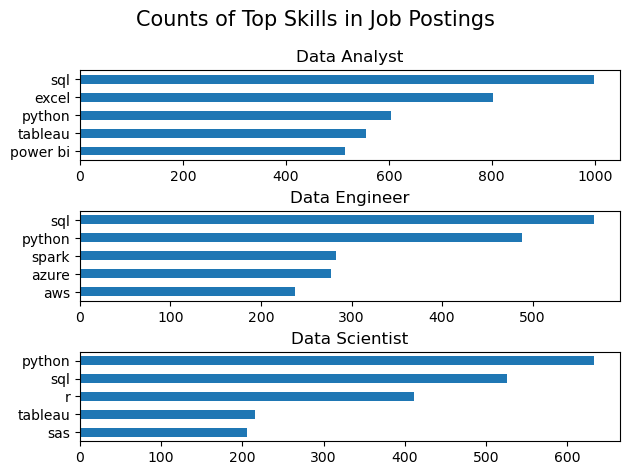

In [15]:
fig, ax = plt.subplots(len(job_titles), 1)

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head(5)
    df_plot.plot(kind='barh', x='job_skills', y='skill_count', ax=ax[i], title=job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)

fig.suptitle('Counts of Top Skills in Job Postings', fontsize=15)
fig.tight_layout(h_pad=0.5) # to fix the overlap
plt.show

In [18]:
df_job_title_count = df_UAE['job_title_short'].value_counts().reset_index(name='jobs_total')

df_job_title_count

,job_title_short,jobs_total
0,Data Analyst,2587
1,Data Scientist,1360
2,Data Engineer,1139
3,Business Analyst,984
4,Software Engineer,480
5,Senior Data Analyst,262
6,Senior Data Scientist,245
7,Senior Data Engineer,227
8,Machine Learning Engineer,164
9,Cloud Engineer,93


In [24]:
df_skills_perc = pd.merge(df_skills_count, df_job_title_count, how='left', on='job_title_short')

df_skills_perc['skill_percent'] = 100 * df_skills_perc['skill_count']/df_skills_perc['jobs_total']

df_skills_perc

,job_skills,job_title_short,skill_count,jobs_total,skill_percent
0,sql,Data Analyst,999,2587,38.616158
1,excel,Data Analyst,803,2587,31.039814
2,python,Data Scientist,633,1360,46.544118
3,python,Data Analyst,605,2587,23.386162
4,sql,Data Engineer,568,1139,49.868306
...,...,...,...,...,...
1080,rshiny,Senior Data Scientist,1,245,0.408163
1081,rshiny,Business Analyst,1,984,0.101626
1082,xamarin,Software Engineer,1,480,0.208333
1083,wsl,Data Scientist,1,1360,0.073529


<function matplotlib.pyplot.show(close=None, block=None)>

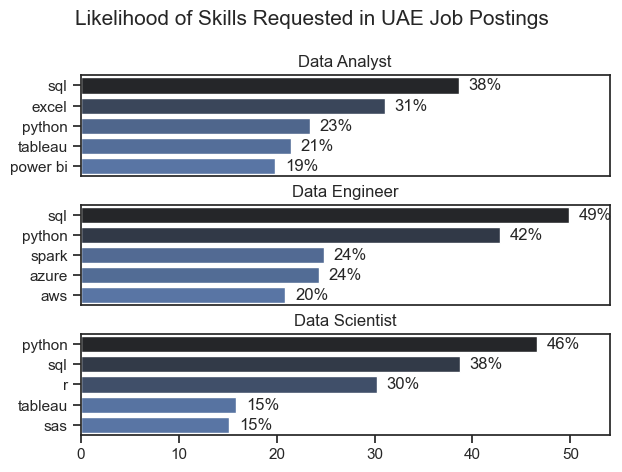

In [42]:
fig, ax = plt.subplots(len(job_titles), 1)

sns.set_theme(style='ticks')

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_perc[df_skills_perc['job_title_short'] == job_title].head(5)
    sns.barplot(data=df_plot, x='skill_percent', y='job_skills', ax=ax[i], hue='skill_count', palette='dark:b_r')
    ax[i].set_title(job_title)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].get_legend().remove()
    ax[i].set_xlim(0, 54)

    for n, v in enumerate(df_plot['skill_percent']):
        ax[i].text(v+1, n, f'{int(v)}%', va='center')
    
    if i != len(job_titles) -1:
        ax[i].set_xticks([])

fig.suptitle('Likelihood of Skills Requested in UAE Job Postings', fontsize=15)
fig.tight_layout(h_pad=0.5) # to fix the overlap
plt.show